# 선형회귀를 이용한 보스톤 집값 예측 
* 이전 모델은 참과 거짓 혹은 여러개의 보기 중 하나를 맞추는 문제였지만, 이제는 수치를 예측하는 문제임
* 출력층에 activation함수를 지정할 필요 없음.

## 변수 설명
<보스톤 주택> CRIM - 지역별 범죄 발생률

ZN - 25,000평방 피트를 초과하는 거주 지역의 비율

INDUS - 비상업지역 넓이 비율

CHAS - 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)

NOX - 일산화질수 농도

RM - 거주할 수 있는 방 개수

AGE - 1940년 이전에 건축된 소유 주택의 비율

DIS - 5개 주요 고용센터까지의 가중 거리

RAD - 고속도로 접근 용이도

TAX - 10,000달러당 재산세율

PTRATIO - 지역의 교사와 학생 수 비율

B - 지역의 흑인 거주 비율 <---미국사회의 불편한 진실인가?

LSTAT - 하위 계층의 비율

MEDV - 본인 소유의 주택 가격(중앙값)

## 라이브러리 로드 

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt 

# seed값 설정
seed = 156
np.random.seed(seed)
tf.random.set_seed(seed)

## 데이터 준비 

In [13]:
df = pd.read_csv("/content/sample_data/housing.csv", header = None, delim_whitespace=True)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [14]:
dataset = df.values
X = dataset[:, 0:13]
Y = dataset[:, 13]

In [19]:
# 학습데이터와 테스트 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .3, random_state = seed)

## 모델 생성 

In [16]:
model = Sequential()
model.add(Dense(30, input_dim = 13, activation = 'relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

In [21]:
# 모델 컴파일
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

In [22]:
# 모델 교육
model.fit(X_train, Y_train, batch_size=10, epochs = 200)

Epoch 1/200
36/36 [==============================] - 2s 2ms/step - loss: 5973.2515 - accuracy: 0.0000e+00
Epoch 2/200
36/36 [==============================] - 0s 2ms/step - loss: 351.2898 - accuracy: 0.0000e+00
Epoch 3/200
36/36 [==============================] - 0s 2ms/step - loss: 163.0869 - accuracy: 0.0000e+00
Epoch 4/200
36/36 [==============================] - 0s 2ms/step - loss: 97.6320 - accuracy: 0.0000e+00
Epoch 5/200
36/36 [==============================] - 0s 2ms/step - loss: 74.9825 - accuracy: 0.0000e+00
Epoch 6/200
36/36 [==============================] - 0s 2ms/step - loss: 86.7513 - accuracy: 0.0000e+00
Epoch 7/200
36/36 [==============================] - 0s 2ms/step - loss: 75.9086 - accuracy: 0.0000e+00
Epoch 8/200
36/36 [==============================] - 0s 2ms/step - loss: 78.5990 - accuracy: 0.0000e+00
Epoch 9/200
36/36 [==============================] - 0s 2ms/step - loss: 78.9993 - accuracy: 0.0000e+00
Epoch 10/200
36/36 [==============================] - 0s 2ms

In [23]:
Y_prediction = model.predict(X_test).flatten()

In [26]:
Y_prediction.shape

(152,)

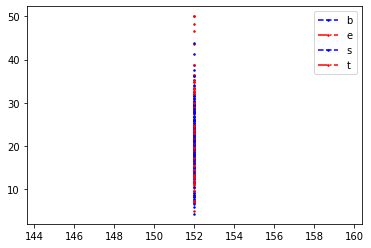

In [37]:
x_len = len(Y_prediction)
for i in range(len(Y_prediction)):
  label = Y_test[i]
  prediction = Y_prediction[i]

  #print("실제 가격 : {:.3f}, 예상가격 : {:.3f}".format(label, prediction))
  plt.plot(x_len, prediction, marker = '.', c = 'b', ls = '--', markersize = 3, label = '예측치')
  plt.plot(x_len, label, marker = '.', c = 'r', ls = '-.', markersize = 3, label = '실제값')
  plt.grid()
  plt.legend('best')
plt.show()